# Exploratory Analysis

In [1]:
import arff

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import fastai.tabular.all as fai

## Load data

In [2]:
freq_data = arff.load('data/freMTPL2freq.arff')
freq_df = pd.DataFrame(
    freq_data, 
    columns=[
        "IDpol", 
        "ClaimNb", 
        "Exposure", 
        "Area", 
        "VehPower",
        "VehAge",
        "DrivAge", 
        "BonusMalus", 
        "VehBrand", 
        "VehGas", 
        "Density", 
        "Region"
    ]
)

In [3]:
freq_df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75000,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0.0,0.00274,'E',4.0,0.0,54.0,50.0,'B12',Regular,3317.0,'R93'
678009,6114327.0,0.0,0.00274,'E',4.0,0.0,41.0,95.0,'B12',Regular,9850.0,'R11'
678010,6114328.0,0.0,0.00274,'D',6.0,2.0,45.0,50.0,'B12',Diesel,1323.0,'R82'
678011,6114329.0,0.0,0.00274,'B',4.0,0.0,60.0,50.0,'B12',Regular,95.0,'R26'


In [4]:
sev_data = arff.load('data/freMTPL2sev.arff')
sev_df = pd.DataFrame(sev_data, columns=["IDpol", "ClaimAmount"])

In [5]:
sev_df

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00
...,...,...
26634,3254353.0,1200.00
26635,3254353.0,1800.00
26636,3254353.0,1000.00
26637,2222064.0,767.55


## Basic data inspection

### Investigate missing values

In [6]:
freq_df.isnull().any()

IDpol         False
ClaimNb       False
Exposure      False
Area          False
VehPower      False
VehAge        False
DrivAge       False
BonusMalus    False
VehBrand      False
VehGas        False
Density       False
Region        False
dtype: bool

In [7]:
sev_df.isnull().any()

IDpol          False
ClaimAmount    False
dtype: bool

### Check cardinality of categorical values

In [8]:
cont_vars, cat_vars = fai.cont_cat_split(freq_df)

In [9]:
freq_df[cat_vars].nunique()

Area         6
VehBrand    11
VehGas       2
Region      22
dtype: int64

In [10]:
for cat_var in cat_vars:
    print(sorted(pd.unique(freq_df[cat_var])))

["'A'", "'B'", "'C'", "'D'", "'E'", "'F'"]
["'B1'", "'B10'", "'B11'", "'B12'", "'B13'", "'B14'", "'B2'", "'B3'", "'B4'", "'B5'", "'B6'"]
['Diesel', 'Regular']
["'R11'", "'R21'", "'R22'", "'R23'", "'R24'", "'R25'", "'R26'", "'R31'", "'R41'", "'R42'", "'R43'", "'R52'", "'R53'", "'R54'", "'R72'", "'R73'", "'R74'", "'R82'", "'R83'", "'R91'", "'R93'", "'R94'"]


### Calculate data ranges

In [11]:
def col_min_max(df):
    return pd.DataFrame([df.min(), df.max()], index=['min', 'max'])

In [12]:
col_min_max(freq_df)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
min,1.0,0.0,0.002732,'A',4.0,0.0,18.0,50.0,'B1',Diesel,1.0,'R11'
max,6114330.0,16.0,2.010000,'F',15.0,100.0,100.0,230.0,'B6',Regular,27000.0,'R94'


In [13]:
col_min_max(sev_df)

,IDpol,ClaimAmount
min,139.0,1.00
max,6113971.0,4075400.56


## Quick data transformation

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
enc = OneHotEncoder()
enc.fit(freq_df[cat_vars])
enc.categories_

[array(["'A'", "'B'", "'C'", "'D'", "'E'", "'F'"], dtype=object),
 array(["'B1'", "'B10'", "'B11'", "'B12'", "'B13'", "'B14'", "'B2'",
        "'B3'", "'B4'", "'B5'", "'B6'"], dtype=object),
 array(['Diesel', 'Regular'], dtype=object),
 array(["'R11'", "'R21'", "'R22'", "'R23'", "'R24'", "'R25'", "'R26'",
        "'R31'", "'R41'", "'R42'", "'R43'", "'R52'", "'R53'", "'R54'",
        "'R72'", "'R73'", "'R74'", "'R82'", "'R83'", "'R91'", "'R93'",
        "'R94'"], dtype=object)]

In [16]:
cat_enc_df = pd.DataFrame(
    enc.transform(freq_df[cat_vars]).toarray(), 
    columns=enc.get_feature_names_out(cat_vars), 
)
cat_enc_df

,Area_'A',Area_'B',Area_'C',Area_'D',Area_'E',Area_'F',VehBrand_'B1',VehBrand_'B10',VehBrand_'B11',VehBrand_'B12',...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
678009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
678010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
678011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualize data

### Preprocess data

In [17]:
claim_df = pd.concat([freq_df[cont_vars], cat_enc_df], axis=1)
claim_df = pd.merge(claim_df, sev_df, how='left', on='IDpol')
claim_df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_'A',Area_'B',...,Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94',ClaimAmount
0,1.0,1.0,0.10000,5.0,0.0,55.0,50.0,1217.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,3.0,1.0,0.77000,5.0,0.0,55.0,50.0,1217.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,5.0,1.0,0.75000,6.0,2.0,52.0,50.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,10.0,1.0,0.09000,7.0,0.0,46.0,50.0,76.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,11.0,1.0,0.84000,7.0,0.0,46.0,50.0,76.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679508,6114326.0,0.0,0.00274,4.0,0.0,54.0,50.0,3317.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
679509,6114327.0,0.0,0.00274,4.0,0.0,41.0,95.0,9850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
679510,6114328.0,0.0,0.00274,6.0,2.0,45.0,50.0,1323.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
679511,6114329.0,0.0,0.00274,4.0,0.0,60.0,50.0,95.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


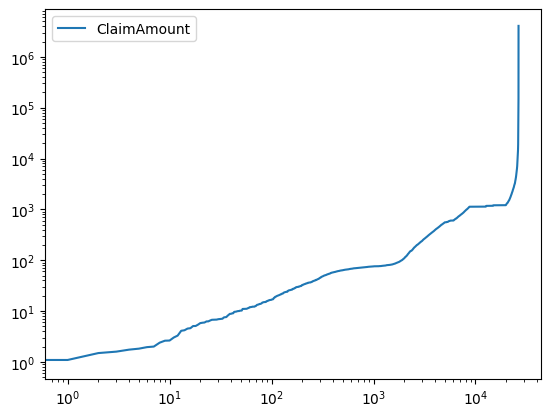

In [18]:
ax = claim_df.sort_values('ClaimAmount').reset_index().plot(y='ClaimAmount')
_ = ax.set(
    xscale='log', 
    yscale='log', 
)

The dependent variable containing the claims amounts has a huge range! There also seem to be a fair amount of outliers. I think it makes sense to continue by using the log(ClaimAmount).

In [19]:
null_claim = claim_df['ClaimAmount'].isna()

In [20]:
def log_col(df, col):
    """
    Convert a column of a dataframe to its log.
    """
    out_df = df.copy()
    out_df = out_df.rename({col: f"log{col}"}, axis=1)
    out_df.loc[~out_df[f"log{col}"].isna(), f"log{col}"] = (
        np.log(out_df.loc[~out_df[f"log{col}"].isna(), f"log{col}"])
    )
    return out_df

In [21]:
log_claim_df = log_col(claim_df, 'ClaimAmount')
log_claim_df[~null_claim]

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_'A',Area_'B',...,Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94',logClaimAmount
66,139.0,1.0,0.75,7.0,1.0,61.0,50.0,27000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.713733
93,190.0,1.0,0.14,12.0,5.0,50.0,60.0,56.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.591781
199,414.0,1.0,0.14,4.0,0.0,36.0,85.0,4792.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.283826
205,424.0,2.0,0.62,10.0,0.0,51.0,100.0,27000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.897341
206,424.0,2.0,0.62,10.0,0.0,51.0,100.0,27000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.194654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678974,6113793.0,1.0,0.14,7.0,2.0,51.0,50.0,178.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.478667
678998,6113817.0,1.0,0.17,4.0,0.0,35.0,51.0,1719.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.161063
679015,6113834.0,2.0,0.17,15.0,3.0,36.0,50.0,181.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.238928
679016,6113834.0,2.0,0.17,15.0,3.0,36.0,50.0,181.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.570649


In [22]:
# These bins will be useful for the t-SNE plots below
y_bins = pd.cut(
    log_claim_df.loc[~null_claim, 'logClaimAmount'], 
    192, 
    labels = list(range(192)), 
)
y_bins

66         72
93         95
199        91
205        87
206       115
         ... 
678974     94
678998     90
679015    116
679016     95
679153     91
Name: logClaimAmount, Length: 26444, dtype: category
Categories (192, int64): [0 < 1 < 2 < 3 ... 188 < 189 < 190 < 191]

In [23]:
log_claim_label_df = log_claim_df.copy()
log_claim_label_df['logClaimLabel'] = y_bins.astype(int) + 64
log_claim_label_df['logClaimLabel'] = (
    log_claim_label_df['logClaimLabel'].fillna(0)
)
log_claim_label_df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_'A',Area_'B',...,Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94',logClaimAmount,logClaimLabel
0,1.0,1.0,0.10000,5.0,0.0,55.0,50.0,1217.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
1,3.0,1.0,0.77000,5.0,0.0,55.0,50.0,1217.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
2,5.0,1.0,0.75000,6.0,2.0,52.0,50.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,10.0,1.0,0.09000,7.0,0.0,46.0,50.0,76.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,11.0,1.0,0.84000,7.0,0.0,46.0,50.0,76.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679508,6114326.0,0.0,0.00274,4.0,0.0,54.0,50.0,3317.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0
679509,6114327.0,0.0,0.00274,4.0,0.0,41.0,95.0,9850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
679510,6114328.0,0.0,0.00274,6.0,2.0,45.0,50.0,1323.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
679511,6114329.0,0.0,0.00274,4.0,0.0,60.0,50.0,95.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


### tSNE plot to visualize the full dataset
I noticed up above by looking at the sample counts of some of the dataframes displayed that there is a huge amount of data for people who have never put in a claim. I think this would be very confusing for the model if we just filled zeros for those people as their driving situation may very well be risky, just that they haven't gotten into an accident since accidents are just an approximate proxy for risk. This study is aimed at one of the methods for convincing me that we can leave this data out because it has similar distributions to the "claims" data.

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [25]:
def tsne(df, **kwargs):
    return TSNE(**kwargs).fit_transform(df)

In [26]:
min_max_scaler = MinMaxScaler()

First the spread of samples with claims is viewed in a latent space that can be plotted. The log claims amounts are color-coded starting at 64. This will leave ample room to later clearly see the cases without any claims which will be put at zero.

In [27]:
log_claim_feat_sample_df = (
    log_claim_label_df.loc[log_claim_label_df['logClaimLabel'] != 0, :]
        .drop(['logClaimAmount', 'logClaimLabel'], axis=1)
        .sample(2000)
)
log_claim_feat_sample = min_max_scaler.fit_transform(log_claim_feat_sample_df)
log_claim_feat_tsne = tsne(
    log_claim_feat_sample, 
    perplexity=50, 
    learning_rate='auto', 
    init='pca'
)

In [28]:
log_claim_tsne_df = pd.DataFrame(
    log_claim_feat_tsne, 
    columns=['tsne_x', 'tsne_y'], 
    index=log_claim_feat_sample_df.index, 
)
log_claim_tsne_df['logClaimLabel'] = (log_claim_label_df['logClaimLabel'])
log_claim_tsne_nonull_df = log_claim_tsne_df.copy()

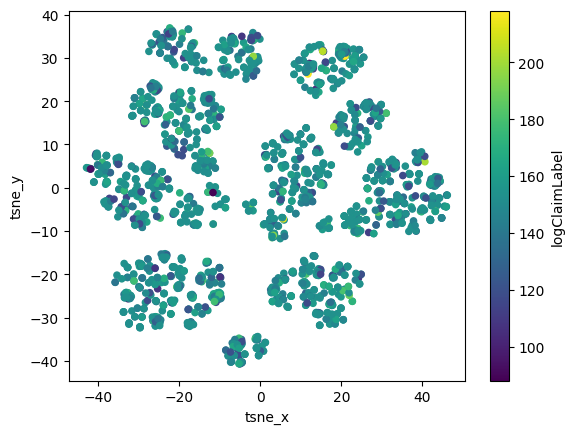

In [29]:
ax = (
    log_claim_tsne_nonull_df
        .plot.scatter('tsne_x', 'tsne_y', c='logClaimLabel', alpha=1)
)

In [30]:
min_max_scaler = MinMaxScaler()

In [31]:
log_claim_feat_sample_df = (
    log_claim_label_df
        .drop(['logClaimAmount', 'logClaimLabel'], axis=1)
        .sample(2000)
)
log_claim_feat_sample = min_max_scaler.fit_transform(log_claim_feat_sample_df)
log_claim_feat_tsne = tsne(
    log_claim_feat_sample, 
    perplexity=50, 
    learning_rate='auto', 
    init='pca'
)

In [32]:
log_claim_tsne_df = pd.DataFrame(
    log_claim_feat_tsne, 
    columns=['tsne_x', 'tsne_y'], 
    index=log_claim_feat_sample_df.index, 
)
log_claim_tsne_df['logClaimLabel'] = (log_claim_label_df['logClaimLabel'])
log_claim_tsne_all_df = log_claim_tsne_df.copy()

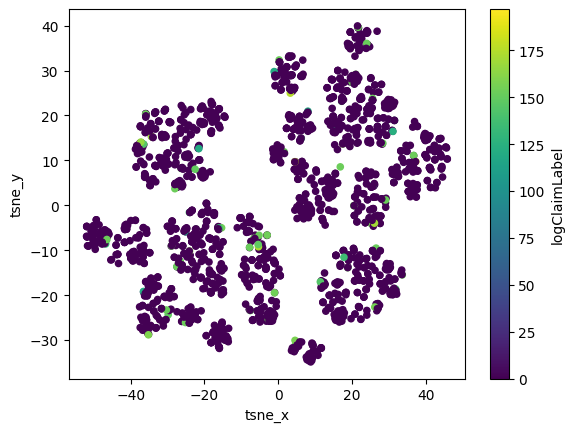

In [33]:
ax = (
    log_claim_tsne_all_df
        .plot.scatter('tsne_x', 'tsne_y', c='logClaimLabel', alpha=1)
)

Here were we now include a sampling of all the data, as expected, both populations seem to be distributed evenly.

## Plot feature correlation

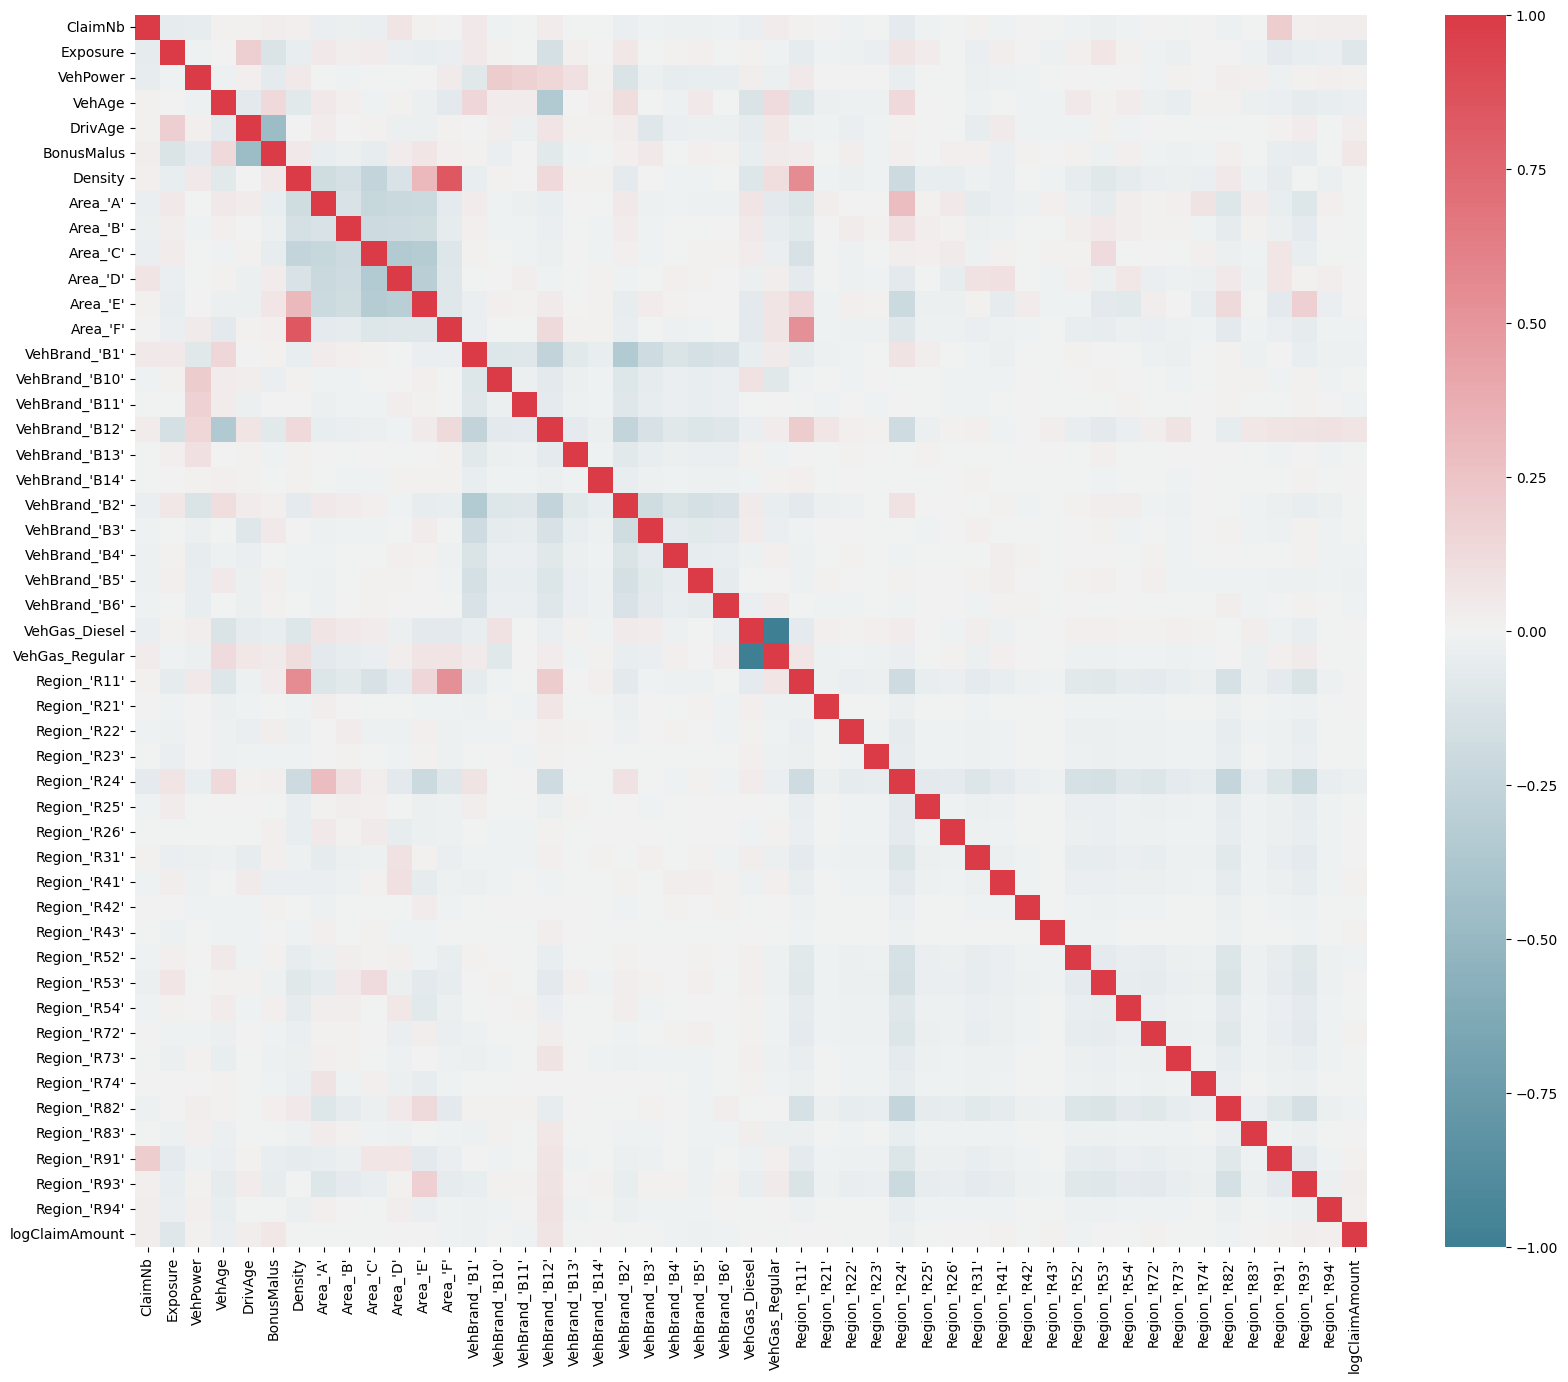

In [34]:
fig, ax = plt.subplots(figsize=(20, 16))
corr = (
    log_claim_df.loc[~null_claim, :]
        .drop('IDpol', axis=1)
        .corr()
)
_ = sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Only very few of the one-hot encoded categorical variables have some reasonable amount of correlation with each other and the Density variable.

In [35]:
# Correlation to the dependent variable
log_claim_corr = corr.loc[:, ['logClaimAmount']].sort_values('logClaimAmount') 
log_claim_corr

,logClaimAmount
Exposure,-0.100243
VehAge,-0.034256
Region_'R24',-0.025737
VehBrand_'B5',-0.021183
VehBrand_'B1',-0.020510
VehBrand_'B4',-0.015149
Region_'R52',-0.014615
Region_'R82',-0.011891
VehBrand_'B11',-0.010799
VehBrand_'B6',-0.010238


The correlation to the dependent variable is pretty poor here for all of the features. I suspect that a model with quite some flexibility will be needed.

In [36]:
# Get a closer look at the important part of the correlation table
thresh_corr = corr.copy()
thresh_corr[np.abs(thresh_corr) < 0.4] = np.NAN
thresh_corr[thresh_corr == 1] = np.NAN
thresh_corr = thresh_corr.loc[thresh_corr.any(), thresh_corr.any()]
for feature in thresh_corr.columns:
    thresh_corr.loc[feature, feature] = 1

In [37]:
pd.set_option('display.max_columns', 50)
display(thresh_corr)
pd.reset_option('^display.', silent=True)

,DrivAge,BonusMalus,Density,Area_'F',VehGas_Diesel,VehGas_Regular,Region_'R11'
DrivAge,1.000000,-0.469888,NaN,NaN,NaN,NaN,NaN
BonusMalus,-0.469888,1.000000,NaN,NaN,NaN,NaN,NaN
Density,NaN,NaN,1.000000,0.842189,NaN,NaN,0.550209
Area_'F',NaN,NaN,0.842189,1.000000,NaN,NaN,0.526860
VehGas_Diesel,NaN,NaN,NaN,NaN,1.0,-1.0,NaN
VehGas_Regular,NaN,NaN,NaN,NaN,-1.0,1.0,NaN
Region_'R11',NaN,NaN,0.550209,0.526860,NaN,NaN,1.000000


## Plot histograms of all features
*** Note the log scale in the following plots as well as the axes limits!!! Also note that most of them are density histograms so the blue and orange datasets have a chance to lie on top of each other. ***

In [38]:
claim_cont_cat_df = pd.merge(freq_df, sev_df, how='left', on='IDpol') 
log_claim_cont_cat_df = log_col(claim_cont_cat_df, 'ClaimAmount')
log_claim_cont_cat_df.loc[:, cat_vars] = (
    log_claim_cont_cat_df[cat_vars].astype('category')
)
log_claim_cont_cat_nonull_df = log_claim_cont_cat_df.loc[~null_claim, :]
log_claim_cont_cat_nonull_df.loc[:, cat_vars] = (
    log_claim_cont_cat_nonull_df[cat_vars].astype('category')
)
n_samp = len(log_claim_cont_cat_df)
n_nonull_samp = len(log_claim_tsne_nonull_df)

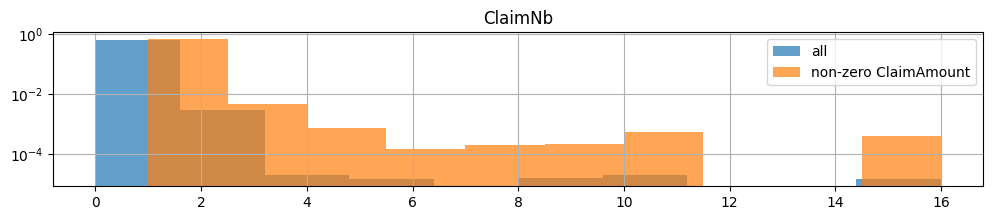

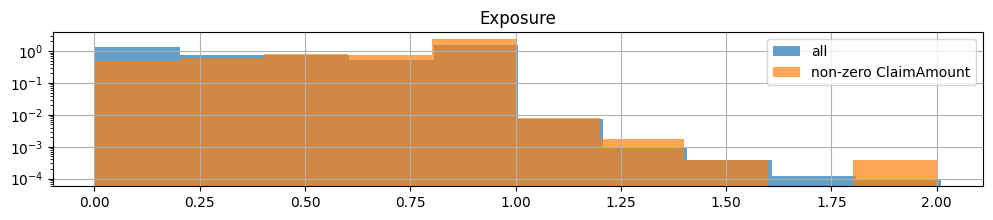

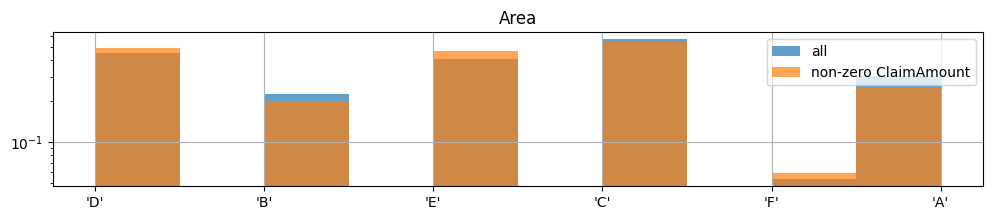

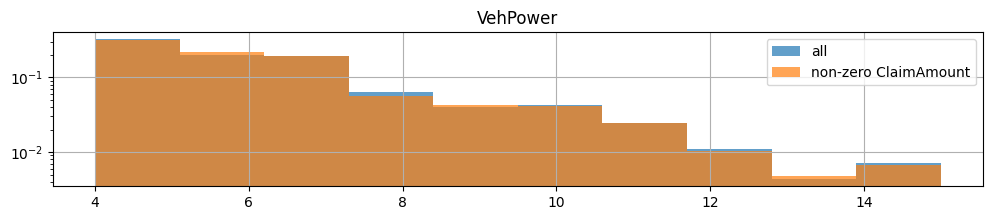

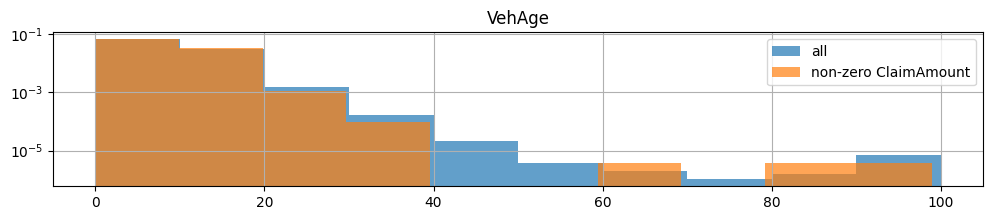

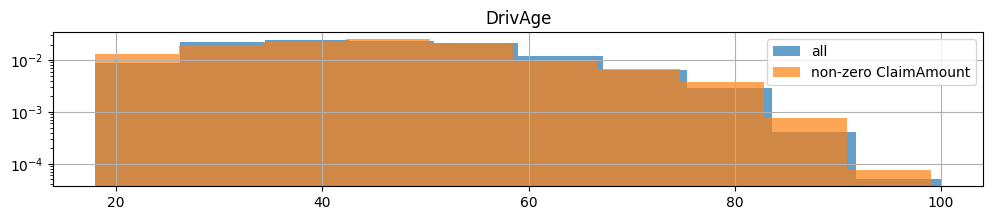

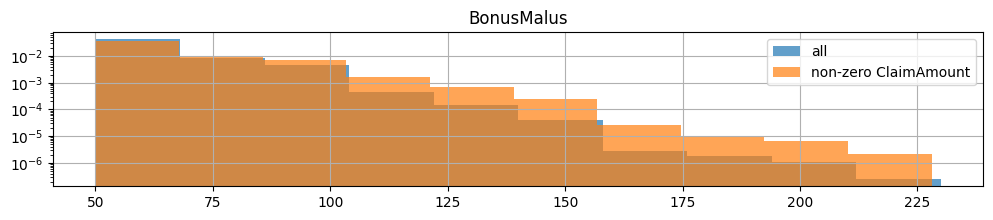

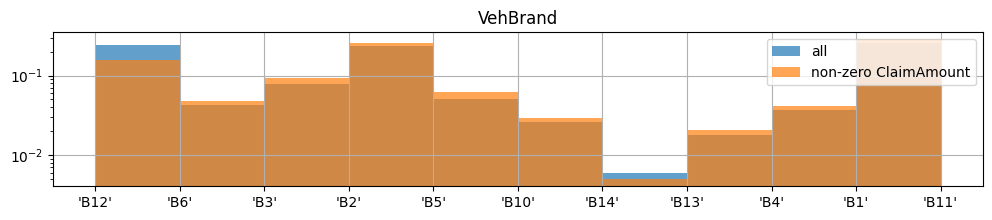

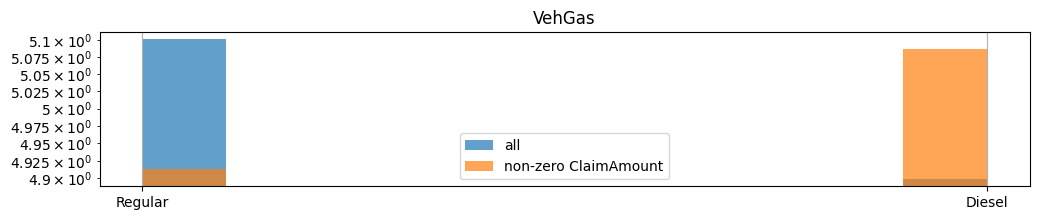

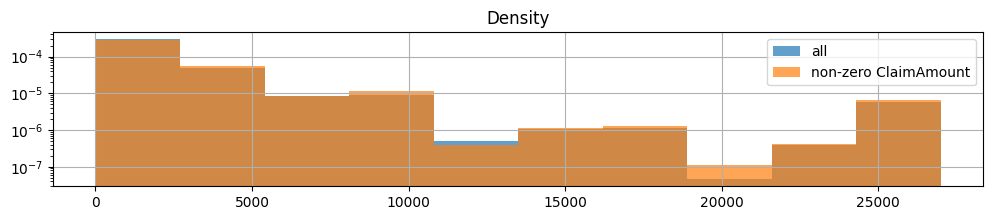

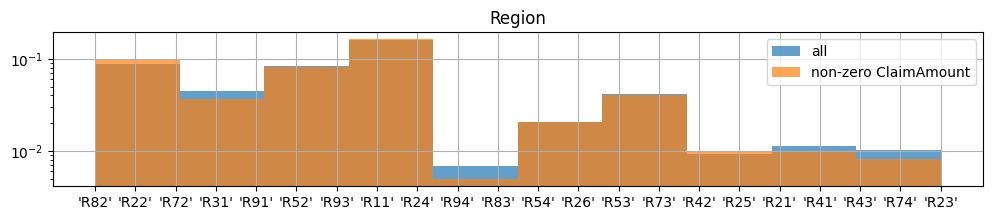

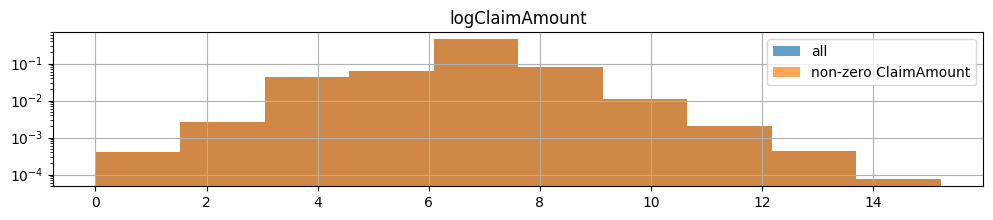

In [39]:
for var in log_claim_cont_cat_df.columns:
    if var=='IDpol':
        continue
    fig, ax = plt.subplots(figsize=(12, 2))
    hist_args = dict(
        density=True, 
        alpha=0.7, 
        ax=ax, 
    )
    log_claim_cont_cat_df[var].hist(**hist_args, label='all')
    (
        log_claim_cont_cat_nonull_df[var]
            .hist(**hist_args, label='non-zero ClaimAmount')
    )
    ax.legend()
    _ = ax.set(
        title=var, 
        yscale='log'
    )

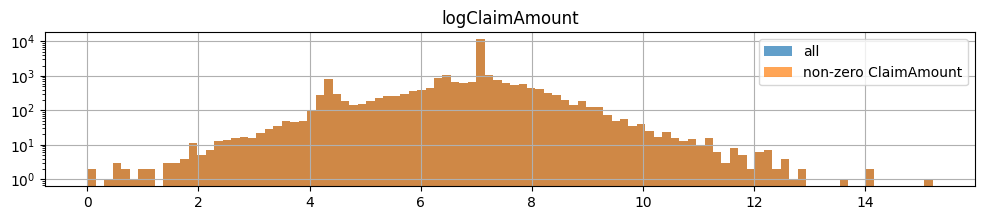

In [40]:
for var in log_claim_cont_cat_df.columns:
    if var=='IDpol':
        continue
    if var!='logClaimAmount':
        continue
    fig, ax = plt.subplots(figsize=(12, 2))
    hist_args = dict(
        density=False, 
        bins=100, 
        alpha=0.7, 
        ax=ax, 
    )
    log_claim_cont_cat_df[var].hist(**hist_args, label='all')
    (
        log_claim_cont_cat_nonull_df[var]
            .hist(**hist_args, label='non-zero ClaimAmount')
    )
    ax.legend()
    _ = ax.set(
        title=var, 
        yscale='log'
    )

1. These histograms further provide evidence of the hypothesis that accidents/claims of value are not necessarily a proxy for driving situation. For the rest of the work, the samples without claims of value will be thrown out.
1. Here also notice the finer histogram of the logClaimAmount. As hinted at before, there are some definite outliers that should probably be thrown out. Above logClaimAmount = 13 for example.
1. There are also 2 pronounced peaks that stick out of the relatively smooth distribution. These may have to be dealt with later. The one right in the middle is 10x larger than the surrounding distribution. Maybe this is some anomaly. It is about 1100 euros. Seems like a very standard amount that mechanics workshops like to take. If this is the case, it is also not a great proxy for risk.

# End